We all experience anxiety. it is a natural human state and a vital part of our lives. Anxiety is often regarded as an artefact of modern societies.

Anxiety helps us to identify and respond to danger in ‘fight or flight’ mode. It can motivate to us face up to dealing with difficult challenges. The ‘right’ amount of anxiety can help us perform better and stimulate action and creativity. 

Our main objective is to classify and find out the levels of anxiety among different age groups.

Various Machine Learning algorithms were applied to predict the level of anxiety. 


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")
from sklearn.metrics import accuracy_score, roc_auc_score


In [14]:
data = pd.read_csv('clean_data.csv')
data

,score,gender,age,Q1,Q2,Q3,Q4,Q5,Q6,Q7,...,Q41,Q42,Q43,Q44,Q45,Q46,Q47,Q48,Q49,Q50
0,32,F,56,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0
1,17,M,30,1.0,0.0,1.0,1.0,0.0,1.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,41,M,32,0.0,1.0,1.0,0.0,1.0,1.0,1.0,...,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0
3,31,M,29,1.0,0.0,0.0,1.0,1.0,1.0,1.0,...,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0
4,35,M,23,1.0,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5405,35,M,27,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
5406,31,F,24,1.0,0.0,0.0,1.0,1.0,1.0,NaN,...,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0
5407,4,M,22,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
5408,41,M,16,1.0,0.0,1.0,0.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0


## EDA
EDA stands for "Exploratory Data Analysis." It is an approach in data analysis that involves visually and statistically summarizing and interpreting the main characteristics, patterns, and relationships within a dataset. EDA is often used at the beginning of a data analysis process to gain insights into the data, identify potential patterns, and formulate hypotheses for more in-depth analysis.

In [15]:
data.describe()

,score,age,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,...,Q41,Q42,Q43,Q44,Q45,Q46,Q47,Q48,Q49,Q50
count,5410.000000,5410.000000,5379.000000,5368.000000,5378.000000,5378.000000,5376.000000,5365.000000,5366.000000,5354.000000,...,5346.000000,5352.000000,5345.000000,5334.000000,5347.000000,5343.000000,5348.000000,5345.000000,5356.000000,5366.000000
mean,32.316451,30.416081,0.351366,0.385991,0.314615,0.518966,0.668899,0.785089,0.751025,0.393538,...,0.687991,0.857997,0.796819,0.588489,0.665233,0.709901,0.710172,0.749298,0.625653,0.142564
std,9.471427,18.206527,0.477442,0.486874,0.464406,0.499687,0.470653,0.410799,0.432460,0.488580,...,0.463357,0.349086,0.402403,0.492154,0.471953,0.453850,0.453725,0.433458,0.483999,0.349661
min,0.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,34.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
75%,39.000000,36.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,50.000000,900.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
data = data[data['age']<=80]

In [17]:
data['score'] = data['score'].apply(lambda x: 'Normal' if 0<=x<=5 else 'Mild' if 6<=x<=20 else 'Moderate' if 21<=x<=35 else 'Severe')


/var/folders/_d/xl9j_yqn1bdf3tpnfw85bgdm0000gn/T/ipykernel_25952/447314390.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['score'] = data['score'].apply(lambda x: 'Normal' if 0<=x<=5 else 'Mild' if 6<=x<=20 else 'Moderate' if 21<=x<=35 else 'Severe')


In [18]:
data['score'].unique()

array(['Moderate', 'Mild', 'Severe', 'Normal'], dtype=object)

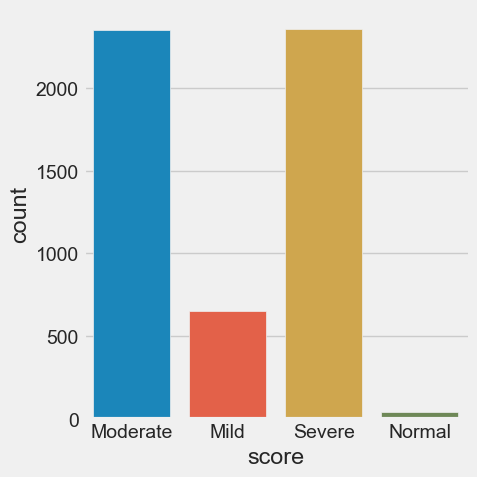

In [21]:
sns.catplot(x='score', data=data, kind='count')


/opt/homebrew/lib/python3.11/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/opt/homebrew/lib/python3.11/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/opt/homebrew/lib/python3.11/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/opt/homebrew/lib/python3.11/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  

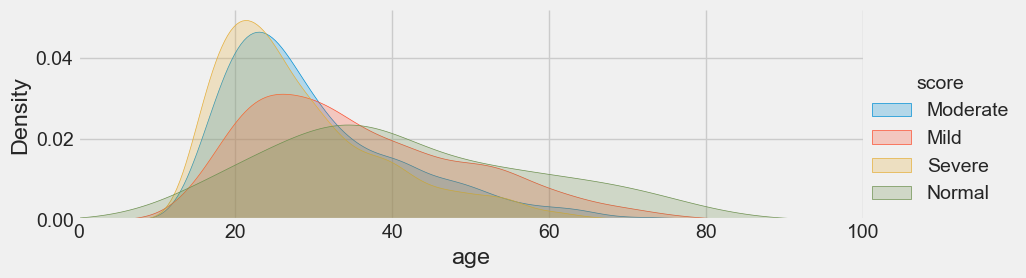

In [20]:
fig = sns.FacetGrid(data, hue="score", aspect=3)
fig.map(sns.kdeplot, 'age', shade=True)
fig.set(xlim=(0,100))
fig.add_legend()

In [22]:
data['age'] = data['age'].apply(lambda x: 'Student' if 14<=x<=25 else 'Working Class' if 26<=x<=45 else 'Middle Age' 
                                    if 46<=x<=60 else 'Senior Citizen')

/var/folders/_d/xl9j_yqn1bdf3tpnfw85bgdm0000gn/T/ipykernel_25952/2582174618.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['age'] = data['age'].apply(lambda x: 'Student' if 14<=x<=25 else 'Working Class' if 26<=x<=45 else 'Middle Age'


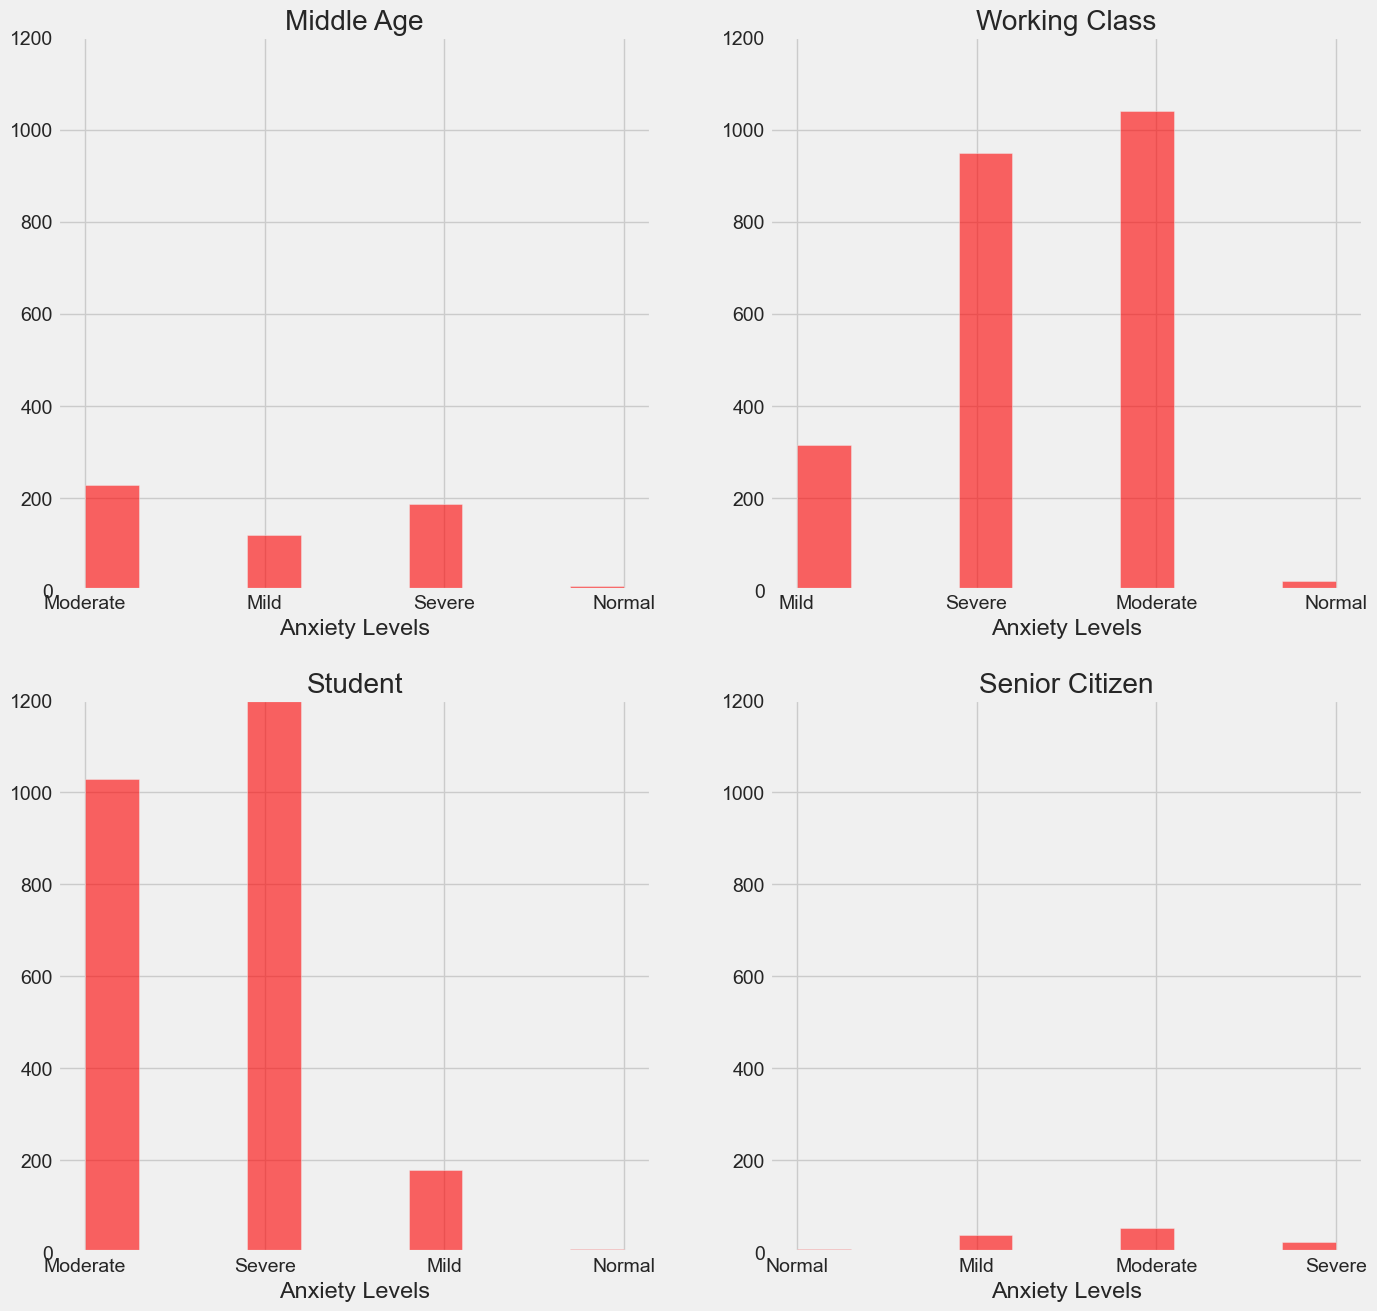

In [23]:
plt.figure(figsize=(15,15))
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.ylim([0,1200])
    a = data['age'].unique()[i]
    plt.title(a)
    data[data["age"] == a]['score'].hist(bins=10, color='red', label=a, alpha=0.6)
    plt.xlabel('Anxiety Levels')

Text(0.5, 0, 'Anxiety Levels')

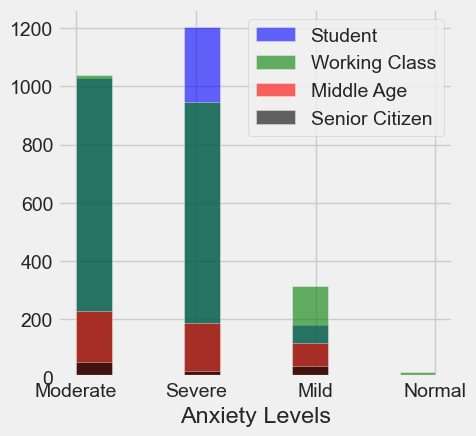

In [24]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
data[data["age"] == 'Student']['score'].hist(bins=10, color='blue', label='Student', alpha=0.6)
data[data["age"] == 'Working Class']['score'].hist(bins=10, color='green', label='Working Class', alpha=0.6)
data[data["age"] == 'Middle Age']['score'].hist(bins=10, color='red', label='Middle Age', alpha=0.6)
data[data["age"] == 'Senior Citizen']['score'].hist(bins=10, color='black', label='Senior Citizen', alpha=0.6)
plt.legend()
plt.xlabel('Anxiety Levels')

# PIPELINE


In [25]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder

In [26]:
#Dropping the 'score' column from the data.
Y = data['score']
X = data.drop(['score'], axis = 1)

In [27]:
#Encoding the 'age' and 'gender' columns using the OrdinalEncoder.
ordinal_encoder = OrdinalEncoder()
X['age'] = ordinal_encoder.fit_transform(X[['age']])

X['gender'] = ordinal_encoder.fit_transform(X[['gender']])

In [28]:
#missing values in numerical columns have been filled with the median.
num_transform = Pipeline([('imputer', SimpleImputer(strategy="median"))])
num_cols = [cname for cname in X.columns if X[cname].dtype in ['float64', 'int64']]

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transform, num_cols)
    ])
X_prep = preprocessor.fit_transform(X)


In [29]:
#preprocessing to the feature data and stores the result in data_X.
data_X = pd.DataFrame(X_prep, columns = [data.columns.drop(['score'])])
data_X.head()

,gender,age,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,...,Q41,Q42,Q43,Q44,Q45,Q46,Q47,Q48,Q49,Q50
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0
1,1.0,3.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,3.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0
3,1.0,3.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,...,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0
4,1.0,2.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,...,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0


In [30]:
for cname in data_X.columns:
    if data_X[cname].dtype == 'float64':
        data_X[cname] = data_X[cname].astype('int64')

# PCA
This code evaluates the results of PCA by displaying the top affecting features for each principal component, along with their explained variance ratios and cumulative variance ratios. It also identifies the number of principal components required to achieve a certain level of variability (e.g., 90%). This analysis helps in understanding how the original features contribute to the principal components and how many principal components are needed to capture the desired amount of variability in the data.


In [31]:
from sklearn.decomposition import PCA

In [32]:
def evaluate(components, eigenValues, eigenVectors, df):
    weightage = {}
    
    col = ['PC'+ str(i+1) for i in range(components.shape[1])]
    transform = pd.DataFrame(components, columns = col)
    display(transform)
    
    var = eigenValues/sum(eigenValues)
    for i in range(1,len(var)+1):
        if sum(var[:i])>=0.9:
            no_of_pc = i
            break
    print(f'\n{no_of_pc} components explains 90% or more variability')
    
    for i in range(no_of_pc):
        top_n = np.argsort( abs(eigenVectors[i]) )[::-1][:4] # shows top 4 affecting features
        weightage['PC'+str(i+1)] = [df.columns[j] for j in top_n]
    
    impact = pd.DataFrame.from_dict(weightage, orient='index')
    impact['Variability (%)'] = var[:no_of_pc]
    impact['Cummulative Variability (%)'] = [sum(var[:i]) for i in range(1,no_of_pc+1)]
    display(impact)
    return transform, impact, no_of_pc

In [33]:
def PCA_lib(df):
    pca = PCA(df.shape[1])
    pca.fit(df)
    eigenVectors = pca.components_.T
    eigenValues = pca.explained_variance_
    components = pca.transform(df)
    return components, eigenValues, eigenVectors

In [34]:
components, eigenValues, eigenVectors = PCA_lib(data_X)

In [35]:
transform, impact, no_of_pc = evaluate(components, eigenValues, eigenVectors, data_X)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,PC51,PC52
0,0.244122,2.248848,-0.301563,0.262330,-0.658805,-0.919316,-0.322931,-0.910110,-0.332012,-0.190853,...,-0.091576,0.022440,0.405239,-0.129605,-0.307534,-0.122593,-0.058689,-0.064796,0.101595,0.080224
1,2.376635,-0.952435,0.138638,-0.091227,0.467497,-0.237366,-0.757659,0.375592,-0.147235,-0.468797,...,0.482031,-0.352790,0.151579,0.219107,0.407243,0.437648,-0.142320,-0.570691,-0.159095,0.806056
2,-1.345368,-0.708224,0.409412,0.018707,0.318115,0.680849,-0.174609,0.093350,0.320018,0.092069,...,-0.091000,0.014441,-0.119238,-0.258339,-0.053479,0.108293,-0.227872,-0.430085,-0.103163,-0.023931
3,0.076401,-0.706398,-1.304835,-0.612571,0.905016,-0.436311,0.351246,0.366972,0.213778,0.217881,...,0.224436,-0.408372,0.456298,0.859648,-0.033191,-0.114633,-0.350727,0.127991,0.084378,-0.192097
4,-0.361269,0.263160,0.103308,-0.437038,1.176969,0.447754,1.053741,0.238339,-0.093338,-0.284703,...,-0.339394,-0.022364,-0.137884,-0.251701,-0.102841,0.113655,-0.327684,-0.410427,-0.016806,0.001390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5401,-0.297581,-0.786286,-1.069106,-0.049352,-0.270365,-0.285704,-0.065230,-0.330315,1.069813,0.334831,...,-0.114356,-0.079052,0.115981,0.061206,-0.002333,0.045502,-0.100159,-0.030731,0.151939,0.020743
5402,0.054585,0.205599,-0.729003,-0.221752,-0.158687,-0.009827,0.061803,-0.997098,-0.564814,-0.793309,...,-0.022847,0.104871,-0.068057,0.204701,-0.190507,0.099490,0.110925,-0.070774,-0.027942,0.092900
5403,4.134527,-0.065343,0.332728,0.513014,0.722494,-0.140816,-0.003954,-0.192783,0.171498,1.045784,...,-0.069070,0.306310,-0.008861,0.173170,0.027725,-0.059199,0.157622,0.092543,0.205944,0.131299
5404,-1.045459,0.240213,-0.258124,0.266602,0.372673,-0.237251,-0.004933,1.308768,0.280619,0.491386,...,0.071417,0.055736,-0.142600,0.044850,0.053358,-0.068623,-0.009132,-0.045895,-0.040184,0.050891



39 components explains 90% or more variability


,0,1,2,3,Variability (%),Cummulative Variability (%)
PC1,"(Q3,)","(Q23,)","(Q17,)","(Q19,)",0.165630,0.165630
PC2,"(age,)","(gender,)","(Q2,)","(Q10,)",0.072006,0.237636
PC3,"(Q24,)","(Q16,)","(Q9,)","(Q14,)",0.037644,0.275279
PC4,"(Q30,)","(Q19,)","(Q17,)","(Q1,)",0.036971,0.312251
PC5,"(Q11,)","(Q24,)","(Q9,)","(Q22,)",0.033951,0.346202
PC6,"(Q17,)","(Q16,)","(Q18,)","(Q9,)",0.026227,0.372429
PC7,"(Q15,)","(Q22,)","(Q17,)","(Q5,)",0.024793,0.397222
PC8,"(Q43,)","(Q7,)","(Q44,)","(Q18,)",0.023565,0.420787
PC9,"(Q26,)","(Q34,)","(Q24,)","(Q30,)",0.022817,0.443604
PC10,"(Q18,)","(Q14,)","(Q17,)","(Q15,)",0.021623,0.465227


# TRAIN-TEST SPLIT

In [37]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold

In [39]:
X = transform.iloc[:,list(range(0,no_of_pc))]

In [40]:
Y = np.array(Y).reshape(-1,1)
Y = ordinal_encoder.fit_transform(Y)
Y = np.squeeze(Y)

In [41]:
X_train, X_test, Y_train, Y_test  = train_test_split(X, Y, test_size=0.2, random_state=0)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(4324, 39) (1082, 39) (4324,) (1082,)


# CLASSIFIERS

## LOGISTIC REGRESSION

In [53]:
from sklearn.linear_model import LogisticRegression

### GridSearch CV

In [54]:
tuned_parameters_log = {'penalty' : ['l2', 'none'], 'C' : [i for i in range(1,80,10)], 'class_weight' : [None,'balanced'], 
                        'max_iter' : [i for i in range(400,1000,100)]}

In [55]:
log_reg = LogisticRegression(solver = 'lbfgs', random_state = 0, C= 1, class_weight= None, max_iter = 400, penalty = 'l2')
log_reg.fit(X_train, Y_train)

LogisticRegression(C=1, max_iter=400, random_state=0)

In [56]:
pred_log = log_reg.predict(X_test)

### K-fold Cross Validation

In [57]:
cv = KFold(n_splits=10, random_state=0, shuffle=True)
# evaluate model
log_auc = cross_val_score(log_reg, X_train, Y_train, scoring='roc_auc_ovo', cv=cv, n_jobs=-1)
log_accuracy = cross_val_score(log_reg, X_train, Y_train, scoring='accuracy', cv=cv, n_jobs=-1)

In [58]:
pd.DataFrame([[accuracy_score(Y_test, pred_log),  '-'],[np.mean(log_accuracy), np.mean(log_auc)]], columns = ['Accuracy', 'AUC'], index = ['Prediction', 'K-fold'])


,Accuracy,AUC
Prediction,0.963031,-
K-fold,0.955127,0.978635


Text(0, 0.5, 'AUC')

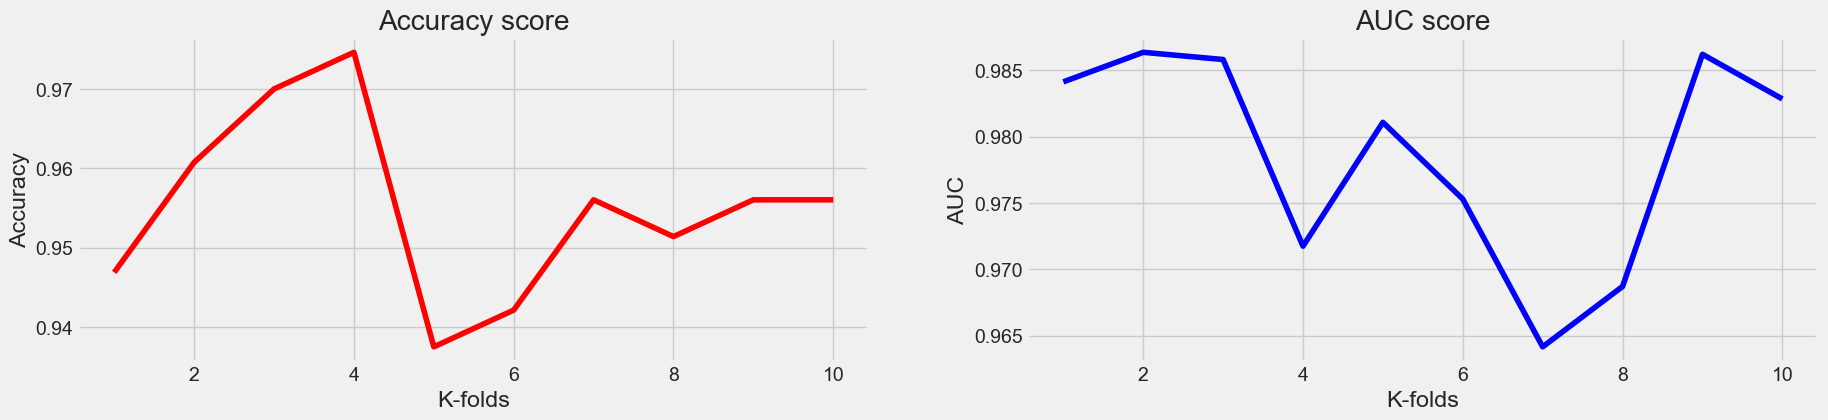

In [59]:
degree = [i for i in range(1,11)]

f, (ax0, ax1)= plt.subplots(1, 2, figsize=(20,4))
ax0.plot(degree,log_accuracy,color='r')
ax0.set_title('Accuracy score')
ax0.set_xlabel('K-folds')
ax0.set_ylabel('Accuracy')

ax1.plot(degree,log_auc,color='b')
ax1.set_title('AUC score')
ax1.set_xlabel('K-folds')
ax1.set_ylabel('AUC')

## SVM

In [60]:
from sklearn.svm import SVC

### GridSearch CV

In [61]:
tuned_parameters_svm = {'C': (np.arange(4,6,0.2)) , 'kernel': ['linear', 'rbf', 'poly'],
                    'gamma': [0.01,0.1,1,10], 'degree': [2,3,4]}

In [62]:
svm = SVC(probability=True, random_state = 0, C = 5, degree = 2, gamma = 0.01, kernel = 'linear')
svm.fit(X_train, Y_train)

SVC(C=5, degree=2, gamma=0.01, kernel='linear', probability=True,
    random_state=0)

In [63]:
pred_svm = svm.predict(X_test)

### K Fold Cross Validation

In [64]:
cv = KFold(n_splits=10, random_state=0, shuffle=True)
# evaluate model
svm_auc = cross_val_score(svm, X_train, Y_train, scoring='roc_auc_ovo', cv=cv, n_jobs=-1)
svm_accuracy = cross_val_score(svm, X_train, Y_train, scoring='accuracy', cv=cv, n_jobs=-1)

In [65]:
pd.DataFrame([[accuracy_score(Y_test, pred_svm), '-'],[np.mean(svm_accuracy),np.mean(svm_auc)]], columns = ['Accuracy', 'AUC'], index = ['Prediction', 'K-fold'])


,Accuracy,AUC
Prediction,0.975046,-
K-fold,0.964150,0.981163


Text(0, 0.5, 'AUC')

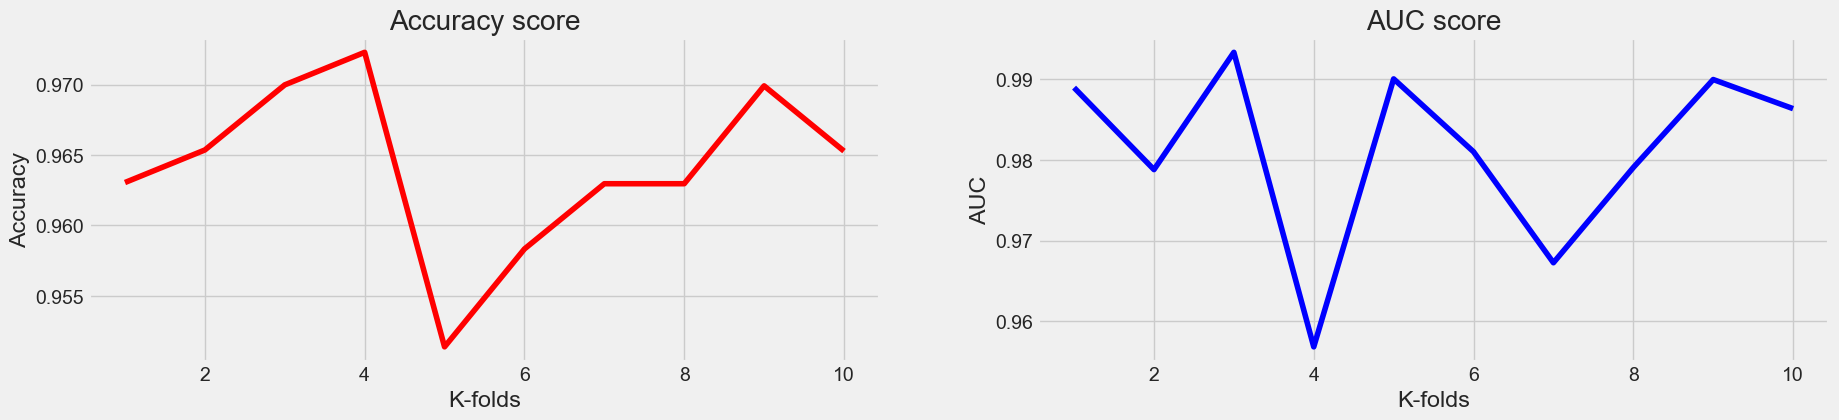

In [66]:
degree = [i for i in range(1,11)]

f, (ax0, ax1)= plt.subplots(1, 2, figsize=(20,4))
ax0.plot(degree,svm_accuracy,color='r')
ax0.set_title('Accuracy score')
ax0.set_xlabel('K-folds')
ax0.set_ylabel('Accuracy')

ax1.plot(degree,svm_auc,color='b')
ax1.set_title('AUC score')
ax1.set_xlabel('K-folds')
ax1.set_ylabel('AUC')

# DECISION TREE

In [67]:
from sklearn.tree import DecisionTreeClassifier

### GridSearch CV

In [68]:
tuned_parameters_dtc = {'criterion' : ['gini', 'entropy'], 'max_depth' : list(range(3,7)), 'min_samples_split' : list(range(3,7)), 
                    'min_samples_leaf' : list(range(3,7)), 'max_leaf_nodes' : list(range(3,12))}

In [69]:
dtc = DecisionTreeClassifier(random_state = 0, criterion = 'gini', max_depth = 3, max_leaf_nodes = 4, min_samples_leaf = 3, min_samples_split = 3)
dtc.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=3, max_leaf_nodes=4, min_samples_leaf=3,
                       min_samples_split=3, random_state=0)

In [70]:
pred_dtc = dtc.predict(X_test)

### K-fold Cross Validation

In [71]:
cv = KFold(n_splits=10, random_state=0, shuffle=True)
# evaluate model
dtc_auc = cross_val_score(dtc, X_train, Y_train, scoring='roc_auc_ovo', cv=cv, n_jobs=-1)
dtc_accuracy = cross_val_score(dtc, X_train, Y_train, scoring='accuracy', cv=cv, n_jobs=-1)

In [72]:
pd.DataFrame([[accuracy_score(Y_test, pred_dtc), '-'],[np.mean(dtc_accuracy), np.mean(dtc_auc)]], columns = ['Accuracy', 'AUC'], index = ['Prediction', 'K-fold'])


,Accuracy,AUC
Prediction,0.959335,-
K-fold,0.940789,0.963203


Text(0, 0.5, 'AUC')

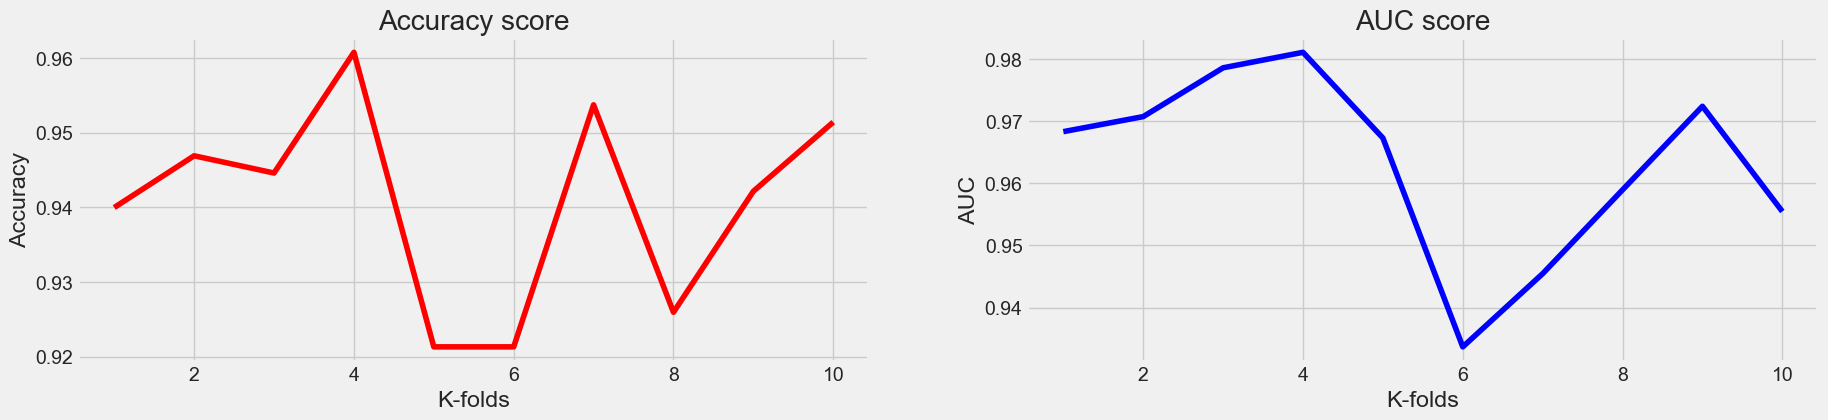

In [73]:
degree = [i for i in range(1,11)]

f, (ax0, ax1)= plt.subplots(1, 2, figsize=(20,4))
ax0.plot(degree,dtc_accuracy,color='r')
ax0.set_title('Accuracy score')
ax0.set_xlabel('K-folds')
ax0.set_ylabel('Accuracy')

ax1.plot(degree,dtc_auc,color='b')
ax1.set_title('AUC score')
ax1.set_xlabel('K-folds')
ax1.set_ylabel('AUC')

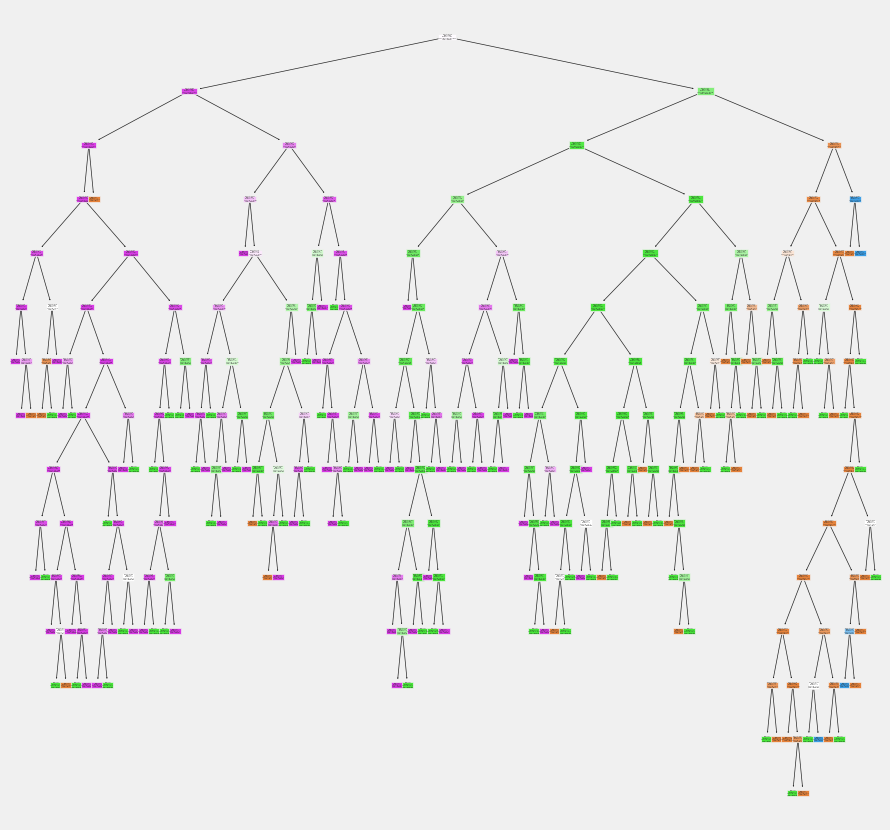

In [85]:
from sklearn import tree
plt.figure(figsize=(10,10))
tree.plot_tree(dtc,
               feature_names=X.columns.tolist(),
               class_names= list(set(data['score'])),
               filled = True)
plt.show()

# COMPARISON MATRICS

In [75]:
from sklearn.metrics import confusion_matrix,classification_report

In [76]:
model_pred = { 'Logistic Regression' : pred_log, 'SVM' : pred_svm, 'Decision Tree Classifier' : pred_dtc}

### Confusion Matrix

In [77]:
for v,k in model_pred.items():
    print(f'{v} :\n{confusion_matrix(Y_test, model_pred[v])}\n\n\n')

Logistic Regression :
[[126   5   0   4]
 [  8 469   0  11]
 [  2   0   4   0]
 [  0  10   0 443]]



SVM :
[[127   3   1   4]
 [  8 471   0   9]
 [  2   0   4   0]
 [  0   0   0 453]]



Decision Tree Classifier :
[[123   7   1   4]
 [  5 469   0  14]
 [  1   0   5   0]
 [  0  12   0 441]]





### Classification Report

In [78]:
for v,k in model_pred.items():
    print(f'{v} :\n{classification_report(Y_test, model_pred[v])}\n\n\n')

Logistic Regression :
              precision    recall  f1-score   support

         0.0       0.93      0.93      0.93       135
         1.0       0.97      0.96      0.97       488
         2.0       1.00      0.67      0.80         6
         3.0       0.97      0.98      0.97       453

    accuracy                           0.96      1082
   macro avg       0.97      0.88      0.92      1082
weighted avg       0.96      0.96      0.96      1082




SVM :
              precision    recall  f1-score   support

         0.0       0.93      0.94      0.93       135
         1.0       0.99      0.97      0.98       488
         2.0       0.80      0.67      0.73         6
         3.0       0.97      1.00      0.99       453

    accuracy                           0.98      1082
   macro avg       0.92      0.89      0.91      1082
weighted avg       0.98      0.98      0.97      1082




Decision Tree Classifier :
              precision    recall  f1-score   support

         0.0  

In [80]:
accuracy = [[accuracy_score(Y_test, pred_log), np.mean(log_accuracy), np.mean(log_auc)], 
            [accuracy_score(Y_test, pred_svm), np.mean(svm_accuracy), np.mean(svm_auc)], 
            [accuracy_score(Y_test, pred_dtc), np.mean(dtc_accuracy), np.mean(dtc_auc)]]

pd.DataFrame(accuracy, columns = ['Prediction Accuracy', 'K-Fold Accuracy', 'AUC score'], 
             index = [ 'Logistic Regression', 'Support Vector Machine', 'Decision Tree Classifier'])

,Prediction Accuracy,K-Fold Accuracy,AUC score
Logistic Regression,0.963031,0.955127,0.978635
Support Vector Machine,0.975046,0.964150,0.981163
Decision Tree Classifier,0.959335,0.940789,0.963203
